In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest
from sklearn import linear_model

# 상관, 회귀 분석

## 상관 분석(Correlation Analysis)

### 정의

>* 두 수량형 변수 간에 선형적 관계의 강도와 방향을 분석하는 통계방법
>* 한 변수가 증가할 때 다른 한 변수가 선형적인 증가 또는 감소하는지 나타낸것. 산점도 활용!

### 이론

>* 상관계수
>>* 두 변수 간의 선형적인 관계 정도와 방향을 수치로 표시한 표준화된 지수
>>* 공분산은 척도의 단위에 따라 달라짐 -> 상관계수 활용
>* 상관계수의 특성
>>* 상관계수의 범위 -1<=r<=1
>>* 한 변수 또는 두 변수의 값에 일정한(0이아닌) 수를 더하거나 곱해도 상관계수는 변하지 않음
>>* 변수 척도의 단위에 영향을 받지 않음
>>* 단, 두 변수간의 연관된 정도를 나타낼 뿐 인과관계를 설명하는 것은 아님

___

### 실습1 - Correlation Analysis

초코칩의 강도와 재료 반죽온도간에 관계를 분석하기 위한 상관분석 실시

In [2]:
df1 = [37.6, 38.6, 37.2, 36.4, 38.6, 39, 37.2, 36.1, 35.9, 37.1, 36.9, 37.5, 36.3, 38.1, 39, 36.9, 36.8, 37.6, 33, 33.5]
df2 = [15, 14, 16, 17, 14, 17, 16, 15, 16, 14, 16, 18, 18, 13, 15, 17, 14, 16, 20, 21]

## 상관분석 실행
corr, pval = stats.pearsonr(df1,df2)
print('Correlation Analysis')
print('corr: %.3f' % corr)
print('p: %.3f' % pval)

Correlation Analysis
corr: -0.718
p: 0.000


corr 값이 -1과 차이가 많이 없으므로 음의 상관관계가 있다고 할 수 있다.

___

## 회귀 분석(Regression)

### 정의

>* 회귀분석은 **독립변수**(요인, Predictor: X)와 **종속변수**(반응변수, Response: Y)의 **함수관계를 통계적으로 찾아보는 분석방법**으로 다양한 모형(Model)로 만들어질 수 있음.

### 이론

>* 회귀모형
>> 종속변수와 설명변수들 간의 관계를 수학적으로 표현한 식
>>> Y = f(X)  
>* 단순 선형 회귀(Simple linear regression)
>> 독립변수가 한 개이고 종속변수가 한 개인 경우 함수관계가 직선방정식의 관계인 것을 가정
>* 다중 선형 회귀(Multiple linear regression)
>> 독립변수가 두 개 이상이고 종속변수가 한 개인 경우 변수관계가 선형방정식의 관계인 것을 가정
>* 비 선형 회귀(Non-linear regression)
>> 독립변수와 종속병수의 관계를 곡선으로 가정하여 분석

---

### 실습2 - Simple Liner Regression

초코칩의 강도와 굽는 시간과의 인과관계를 분석하기 위한 회귀분석 실시

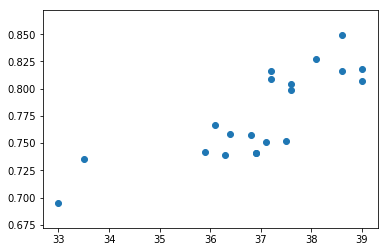

In [21]:
strength = [37.6, 38.6, 37.2, 36.4, 38.6, 39, 37.2, 36.1, 35.9, 37.1, 36.9, 37.5, 36.3, 38.1, 39, 36.9, 36.8, 37.6, 33, 33.5]
baking_time = [0.798922,0.84902,0.816163,0.758266,0.815894,
       0.807477,0.809068,0.7664,0.742243,0.751118,
       0.740629,0.751495,0.738863,0.827428,0.818172,
       0.740939,0.757128,0.804695,0.695121,0.735377]
## 상관분석 실행
# simple linear regression 실행
plt.scatter(strength, baking_time)

In [25]:
strength = sm.add_constant(strength)
model = sm.OLS(baking_time, strength)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     32.90
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.95e-05
Time:                        23:09:44   Log-Likelihood:                 46.530
No. Observations:                  20   AIC:                            -89.06
Df Residuals:                      18   BIC:                            -87.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0023      0.135      0.017      0.987      -0.281       0.286
x1             0.0209      0.004      5.736      0.000       0.013       0.029
==============================================================================
Omnibus:                        2.651   Durbin-Watson:                   1.128
Prob(Omnibus):                  0.266   Jarque-Bera (JB):                1.168
Skew:                           0.047   Prob(JB):                        0.558
Kurtosis:                       1.820   Cond. No.                         898.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

설명력 R-squared이 64.6% 이다.